In [50]:
import pandas as pd

# Load the cleaned data
merged_df = pd.read_csv('../data/cleaned_googleplaystore_data.csv')
# Remove non-numeric characters from 'Installs' column
merged_df['Installs'] = merged_df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

In [51]:
# Descriptive statistics for numerical features
print(merged_df.describe())

# Overview of categorical data like 'Category' and 'Genres'
print(merged_df['Category'].value_counts())
print(merged_df['Genres'].value_counts())
print(merged_df['Installs'].value_counts())


             Rating       Reviews      Installs  Sentiment_Polarity  \
count  28255.000000  2.825500e+04  2.825500e+04        28255.000000   
mean       4.290582  1.184381e+06  3.275824e+07            0.188240   
std        0.309400  5.926846e+06  1.249223e+08            0.354634   
min        2.600000  1.140000e+02  1.000000e+03           -1.000000   
25%        4.100000  8.722000e+03  1.000000e+06            0.000000   
50%        4.300000  5.151700e+04  5.000000e+06            0.157143   
75%        4.500000  3.100660e+05  1.000000e+07            0.418899   
max        4.900000  7.815831e+07  1.000000e+09            1.000000   

       Sentiment_Subjectivity  
count            28255.000000  
mean                 0.492216  
std                  0.264068  
min                  0.000000  
25%                  0.350000  
50%                  0.515741  
75%                  0.650000  
max                  1.000000  
Category
GAME                   4344
FAMILY                 1802
HEALTH_

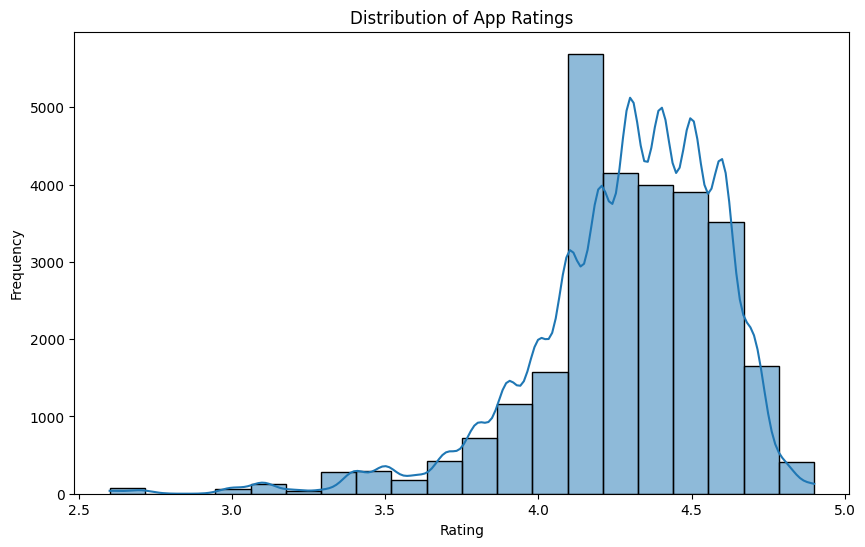

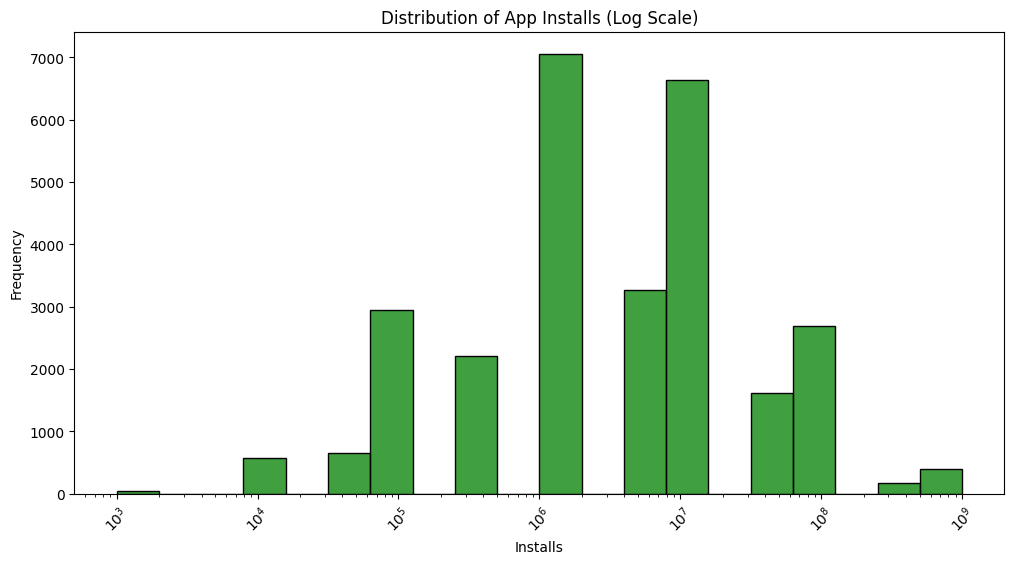

In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Installs distribution
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['Installs'], bins=20, log_scale=True, color='green')
plt.title('Distribution of App Installs (Log Scale)')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Formatter to change the label format
# formatter = ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
# plt.gca().xaxis.set_major_formatter(formatter)

plt.show()


/tmp/ipykernel_4514/2020383887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=merged_df, palette='viridis')


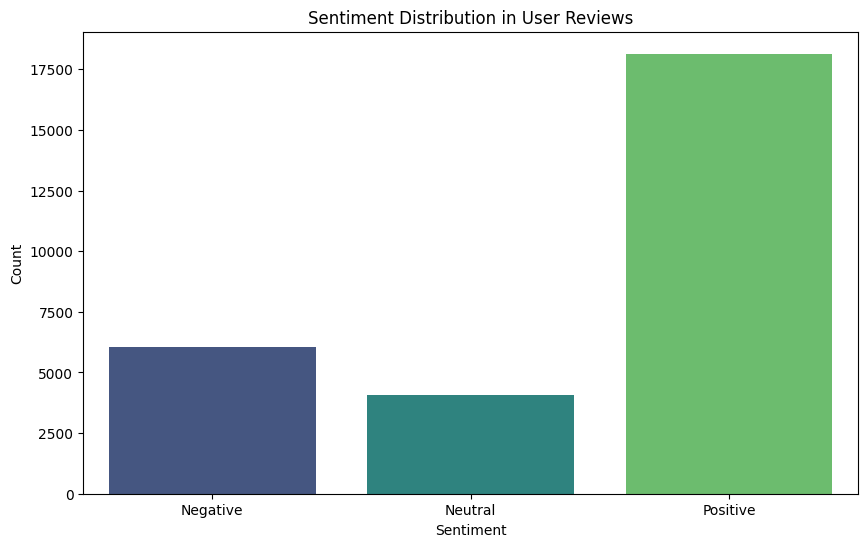

In [42]:
# Sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=merged_df, palette='viridis')
plt.title('Sentiment Distribution in User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

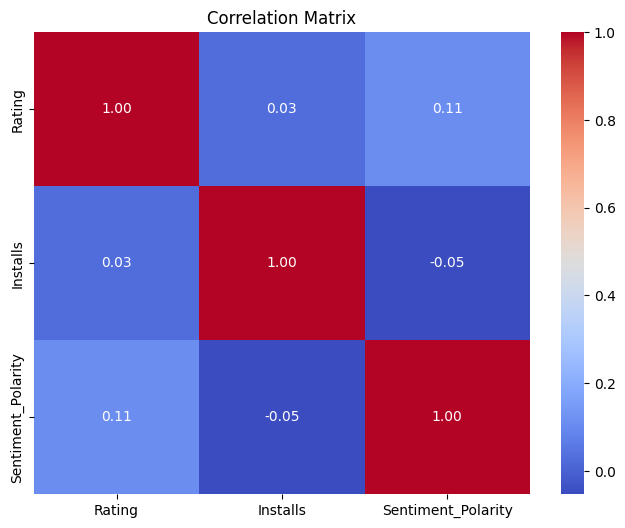

In [44]:
# Correlation matrix
correlation = merged_df[['Rating', 'Installs', 'Sentiment_Polarity']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [48]:
# Filter apps based on criteria: high ratings, reasonable number of installs, and overall positive sentiment
filtered_apps = merged_df[(merged_df['Rating'] > 4.0) & 
                          (merged_df['Installs'] > 100000) & 
                          (merged_df['Installs'] < 5000000) & 
                          (merged_df['Sentiment'] == 'Positive')]

top_apps = filtered_apps['App'].unique()
print("Top recommended apps based on criteria:", top_apps)

Top recommended apps based on criteria: ['Garden Coloring Book' 'Colorfit - Drawing & Coloring'
 'AutoScout24 Switzerland – Find your new car' 'Fuelio: Gas log & costs'
 'Filters for Selfie' 'Filters for B Live' 'FamilySearch Tree'
 'All Maths Formulas' 'English-Myanmar Dictionary'
 'Golden Dictionary (EN-AR)' 'All Language Translator Free'
 'Curriculum vitae App CV Builder Free Resume Maker'
 'Facebook Ads Manager' 'Genius Scan - PDF Scanner'
 'Crew - Free Messaging and Scheduling' 'Asana: organize team projects'
 'AdWords Express' 'DC Comics' 'Firefox Focus: The privacy browser'
 '2ndLine - Second Phone Number' 'Burner - Free Phone Number'
 'All Email Providers' 'Hinge: Dating & Relationships'
 'BBW Dating & Plus Size Chat' 'FastMeet: Chat, Dating, Love'
 'Free Dating App - YoCutie - Flirt, Chat & Meet'
 'Dating for 50 plus Mature Singles – FINALLY'
 'Hide App, Private Dating, Safe Chat - PrivacyHider'
 'FlirtChat - ♥Free Dating/Flirting App♥'
 '95Live -SG#1 Live Streaming App' '2Dat